In [362]:
pip install cbio_py numpy seaborn pandas matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [320]:
from cbio_py import cbio_mod as cb
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

In [33]:
#this is a funcction that searches for a specific keyword in the study name and returns the studies from a list of studies that have that name
def return_study_list_match(studies, keyword):
    study_list = []
    for study in studies:
        if keyword in study['studyId']:
            study_list.append(study)
    return study_list

#This function looks over a list of dictionaries and returns the values of of clinicalattributeId for a specific value
def clincial_attr_ID_value_finder(clinical_data_in_study, clinical_attribute_value):
    clinical_attributes = []
    for clinical_data in clinical_data_in_study:
        if clinical_data['clinicalAttributeId'] == clinical_attribute_value:
            clinical_attributes.append(clinical_data['value'])
    return clinical_attributes

#this function looks up all of the clinical data from a list of studies and then concatenates the data into a single list of clinical
#attribute dictionaries
def return_all_clinical_data_in_studies(studies):
    clinical_data_in_study = []
    for study in studies:
        clinical_data_in_study.extend(cb.getAllClinicalDataInStudy(study['studyId']))
    return clinical_data_in_study

#this function take clinical attributeID and returns the dictiories for that clinical attribute from a list of clinical attributes
def return_clinical_attribute_from_list(clinical_attributes, clinical_attribute_ID):
    clinical_attribute_list = []
    for clinical_attribute in clinical_attributes:
        if clinical_attribute['clinicalAttributeId'] == clinical_attribute_ID:
            clinical_attribute_list.append(clinical_attribute)
    return clinical_attribute_list

#this function returns cancer type sorted by quantile
def quantile_sorter(joined_df, quantile, value):
    dict_list = []
    for i in joined_df.value_x.unique():
        dict_list.append({'cancer_type': i, 'tmb': getattr(joined_df[joined_df['value_x'] == i],value).quantile(quantile)})
    #sort list my tmb value
    sorted_dict_list = sorted(dict_list, key=lambda k: k['tmb'])
    #create a list of cancer types from the sorted dict list
    cancer_types_list = []
    for i in sorted_dict_list:
        cancer_types_list.append(i['cancer_type'])
    # list of cancer types sorted by the 50th percentile tmb value
    return cancer_types_list

In [ ]:
#get the total studies
studies = cb.getAllStudies()

In [8]:
#return studies with the words pan_can in the name
studies_pan_can = return_study_list_match(studies, 'pan_can')

In [38]:
#return the clinical attributes from the list of studies
all_clinical_atrributes = return_all_clinical_data_in_studies(studies_pan_can)

In [351]:
#isolate the cancer types and tumor mutational burden values from the list of unordered clinical attribute data
cancer_types = return_clinical_attribute_from_list(all_clinical_atrributes, 'CANCER_TYPE')
tmb_values = return_clinical_attribute_from_list(all_clinical_atrributes, 'TMB_NONSYNONYMOUS')

In [352]:
#convert to data frames before joining
cancer_types_df = pd.DataFrame(cancer_types)
tmb_values_df = pd.DataFrame(tmb_values)

In [51]:
#this joins the cancer type and tmb values into a single dataframe on patient ID and Sampe ID fields
joined_df = pd.merge(cancer_types_df, tmb_values_df, how='inner',on=['patientId', 'sampleId'])

In [374]:
#see the joined dataset
joined_df.head()

,clinicalAttribute_x,clinicalAttributeId_x,patientId,sampleId,studyId_x,uniquePatientKey_x,uniqueSampleKey_x,value_x,clinicalAttribute_y,clinicalAttributeId_y,studyId_y,uniquePatientKey_y,uniqueSampleKey_y,value_y
365,None,CANCER_TYPE,TCGA-FW-A3R5,TCGA-FW-A3R5-06,skcm_tcga_pan_can_atlas_2018,VENHQS1GVy1BM1I1OnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1GVy1BM1I1LTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS1GVy1BM1I1OnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1GVy1BM1I1LTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,1052.200000
7539,None,CANCER_TYPE,TCGA-A5-A0G2,TCGA-A5-A0G2-01,ucec_tcga_pan_can_atlas_2018,VENHQS1BNS1BMEcyOnVjZWNfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1BNS1BMEcyLTAxOnVjZWNfdGNnYV9wYW5fY2FuX2...,Endometrial Carcinoma,None,TMB_NONSYNONYMOUS,ucec_tcga_pan_can_atlas_2018,VENHQS1BNS1BMEcyOnVjZWNfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1BNS1BMEcyLTAxOnVjZWNfdGNnYV9wYW5fY2FuX2...,861.866667
7675,None,CANCER_TYPE,TCGA-AX-A0J0,TCGA-AX-A0J0-01,ucec_tcga_pan_can_atlas_2018,VENHQS1BWC1BMEowOnVjZWNfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1BWC1BMEowLTAxOnVjZWNfdGNnYV9wYW5fY2FuX2...,Endometrial Carcinoma,None,TMB_NONSYNONYMOUS,ucec_tcga_pan_can_atlas_2018,VENHQS1BWC1BMEowOnVjZWNfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1BWC1BMEowLTAxOnVjZWNfdGNnYV9wYW5fY2FuX2...,518.433333
1490,None,CANCER_TYPE,TCGA-IB-7651,TCGA-IB-7651-01,paad_tcga_pan_can_atlas_2018,VENHQS1JQi03NjUxOnBhYWRfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1JQi03NjUxLTAxOnBhYWRfdGNnYV9wYW5fY2FuX2...,Pancreatic Adenocarcinoma,None,TMB_NONSYNONYMOUS,paad_tcga_pan_can_atlas_2018,VENHQS1JQi03NjUxOnBhYWRfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1JQi03NjUxLTAxOnBhYWRfdGNnYV9wYW5fY2FuX2...,479.300000
8015,None,CANCER_TYPE,TCGA-FI-A2D5,TCGA-FI-A2D5-01,ucec_tcga_pan_can_atlas_2018,VENHQS1GSS1BMkQ1OnVjZWNfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1GSS1BMkQ1LTAxOnVjZWNfdGNnYV9wYW5fY2FuX2...,Endometrial Carcinoma,None,TMB_NONSYNONYMOUS,ucec_tcga_pan_can_atlas_2018,VENHQS1GSS1BMkQ1OnVjZWNfdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1GSS1BMkQ1LTAxOnVjZWNfdGNnYV9wYW5fY2FuX2...,465.966667


In [62]:
#convert value_y to float
joined_df['value_y'] = joined_df['value_y'].astype(float)
#convert value_x to string
joined_df['value_x'] = joined_df['value_x'].astype(str)

In [398]:

cancer_types_list = quantile_sorter(joined_df, 0.5, 'value_y')

['Encapsulated Glioma',
 'Pheochromocytoma',
 'Miscellaneous Neuroepithelial Tumor',
 'Well-Differentiated Thyroid Cancer',
 'Ocular Melanoma',
 'Seminoma',
 'Non-Seminomatous Germ Cell Tumor',
 'Thymic Epithelial Tumor',
 'Leukemia',
 'Fibrolamellar Carcinoma',
 'Pleural Mesothelioma',
 'Prostate Adenocarcinoma',
 'Adrenocortical Carcinoma',
 'Diffuse Glioma',
 'Pancreatic Adenocarcinoma',
 'Invasive Breast Carcinoma',
 'Sarcoma',
 'Cholangiocarcinoma',
 'Renal Clear Cell Carcinoma',
 'Glioblastoma',
 'Ovarian Epithelial Tumor',
 'Renal Non-Clear Cell Carcinoma',
 'Endometrial Carcinoma',
 'Cervical Adenocarcinoma',
 'Hepatocellular Carcinoma',
 'Undifferentiated Stomach Adenocarcinoma',
 'Cervical Squamous Cell Carcinoma',
 'Esophageal Squamous Cell Carcinoma',
 'Colorectal Adenocarcinoma',
 'Head and Neck Squamous Cell Carcinoma',
 'Mature B-Cell Neoplasms',
 'Esophagogastric Adenocarcinoma',
 'Bladder Urothelial Carcinoma',
 'Non-Small Cell Lung Cancer',
 'Melanoma']

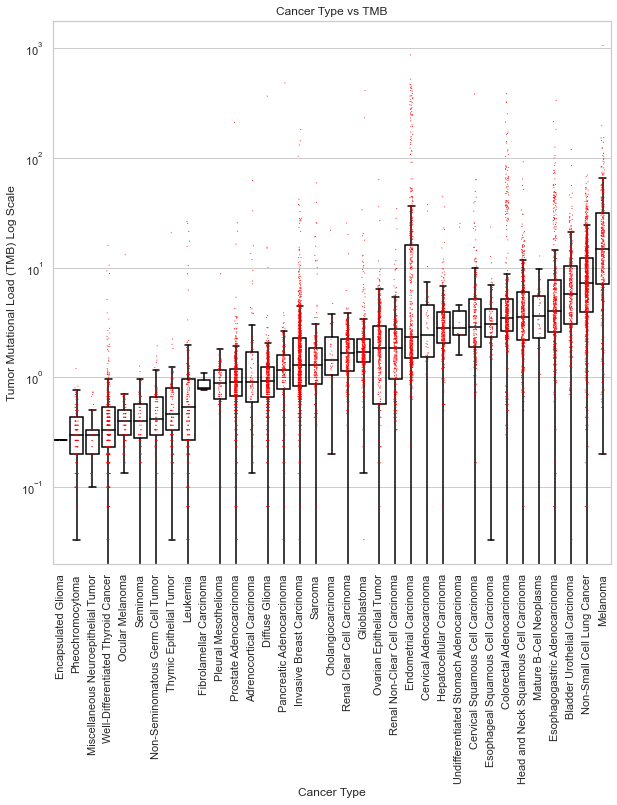

In [395]:
#initialize a graph
sns.set(style="whitegrid")
#this sets the style of the plot
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
# Create a boxplot of the data
ax = sns.boxplot(data=joined_df, x="value_x", y="value_y", showfliers=False, **PROPS, order=cancer_types_list)
ax = sns.stripplot(data=joined_df, x="value_x", y="value_y", jitter=0.1, size=1, color='red', order=cancer_types_list)
#set axis to logarithmic
plt.yscale('log')
#change the x axis labels to be on an angle
plt.xticks(rotation=90)
#change plot size
plt.rcParams["figure.figsize"] = (10,10)
#make x labels alphabetical
plt.xticks(rotation=90)
#change the y axis name to be TMB
plt.ylabel('Tumor Mutational Load (TMB) Log Scale')
#change the x axis name to be cancer type
plt.xlabel('Cancer Type')
#change the graph title
plt.title('Cancer Type vs TMB')
#show the graph
plt.show()